In [1]:
"""In statistics, kernel density estimation (KDE) is a non-parametric way to es
timate the probability density function of a random variable. 
Kernel density estimation is a fundamental data smoothing problem 
where inferences about the population are made, based on a finite data sample."""

'In statistics, kernel density estimation (KDE) is a non-parametric way to es\ntimate the probability density function of a random variable. \nKernel density estimation is a fundamental data smoothing problem \nwhere inferences about the population are made, based on a finite data sample.'

In [2]:
#Standard
import numpy as np
import pandas as pd
from numpy.random import randn

# Stats imports
from scipy import stats

#Plotting imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


(0, 1)

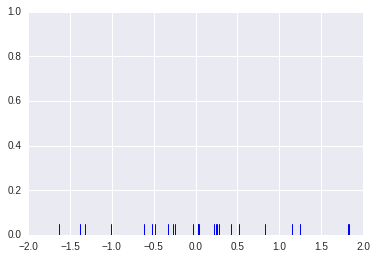

In [5]:
dataset = randn(25)
sns.rugplot(dataset)
plt.ylim(0,1)

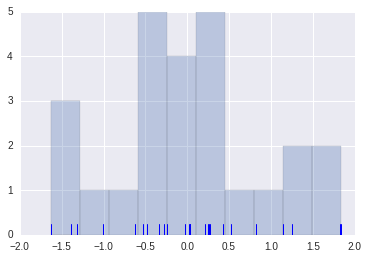

In [7]:
#plot a histogram on top of the rugplot
#alpha parameter indicates transperancy. 0 is clear, 1 is opaque
"""the histogram shows a block whose height is proportionate to the number of ticks inside the bin of the rugplot
Here we have plotted both overlayed"""
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

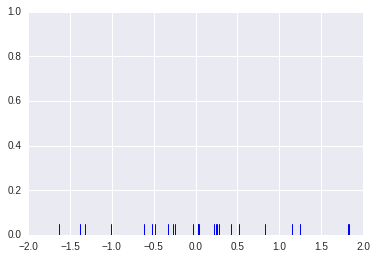

In [11]:
#Now represent each of the ticks with a Gaussian or Normal basis function to get Kernel Density Plot
#Approach 1: Manual
sns.rugplot(dataset)
x_min = dataset.min() - 2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min,x_max,100) #linear spacing and no of points

#See wikipedia for practical estimation of bandwidth
bandwidth = ( (4*dataset.std()**5) / (3*len(dataset))) ** 0.2

(0, 1)

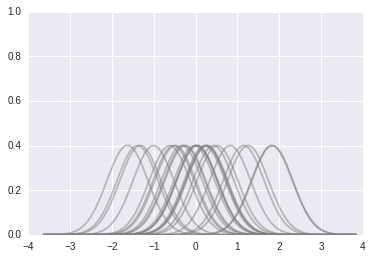

In [12]:
kernel_list = []
for data_point in dataset:
    # Create a kernel for each point and append it to the kernel list
    #stats.norm makes a normal continuous random variable distribution
    #pdf makes probability density function
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)
    
plt.ylim(0,1)
    

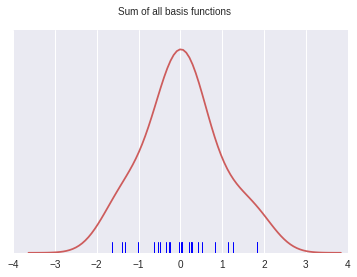

In [17]:
sum_of_kde = np.sum(kernel_list,axis=0)
fig = plt.plot(x_axis,sum_of_kde,color="indianred")
sns.rugplot(dataset)
plt.yticks([]) #get rid of tick marks
plt.suptitle("Sum of all basis functions")

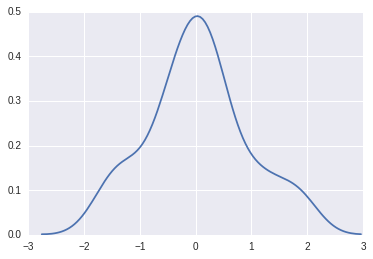

In [18]:
#Approach 2 - One step using Seaborn
sns.kdeplot(dataset)

In [19]:
#adjusting bandwidth of plot to make it more or less sensitive to high frequency

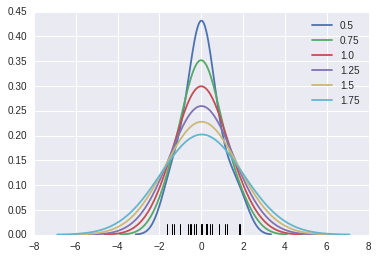

In [20]:
sns.rugplot(dataset, color='black')

for bw in np.arange(0.5,2,0.25): #each bandwidth on the plot from 0.5 to 2 in steps of 0.25
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

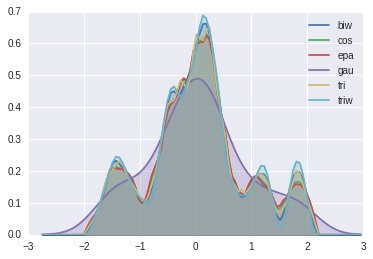

In [22]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern, label=kern,shade=True)

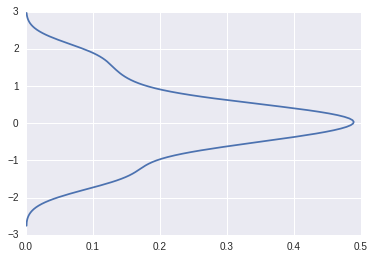

In [23]:
sns.kdeplot(dataset,vertical=True)

In [24]:
"""Check out wikipedia page for Cumulative distribution function"""

'Check out wikipedia page for Cumulative distribution function'

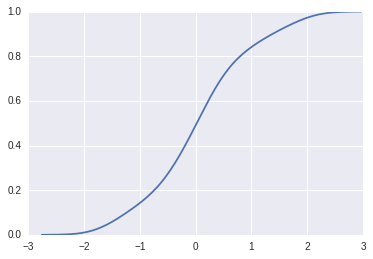

In [25]:
sns.kdeplot(dataset,cumulative=True)

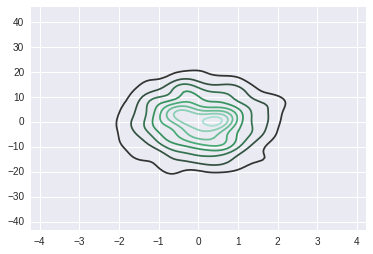

In [26]:
mean = [0,0]

covariance = [[1,0],[0,100]]

size = 1000

dataset2 = np.random.multivariate_normal(mean, covariance, size)

dframe = pd.DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe)

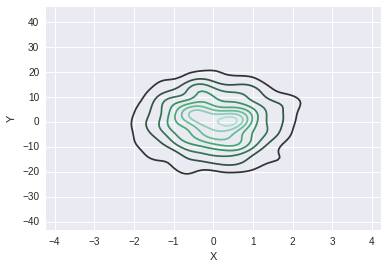

In [27]:
sns.kdeplot(dframe.X,dframe.Y)

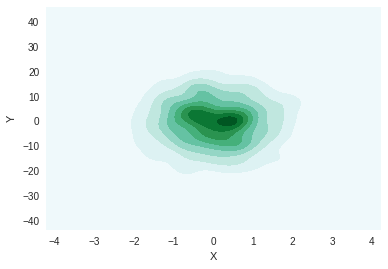

In [28]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

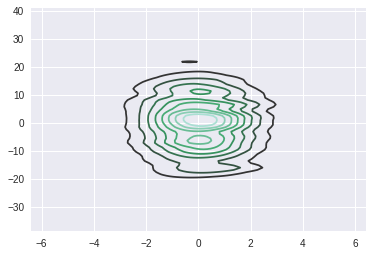

In [29]:
sns.kdeplot(dframe, bw=1)

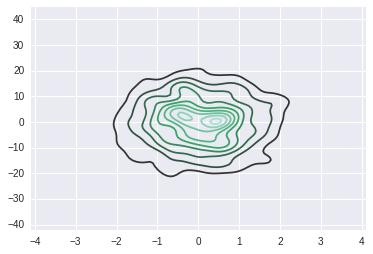

In [31]:
sns.kdeplot(dframe,bw='silverman') #runs silverman distriution

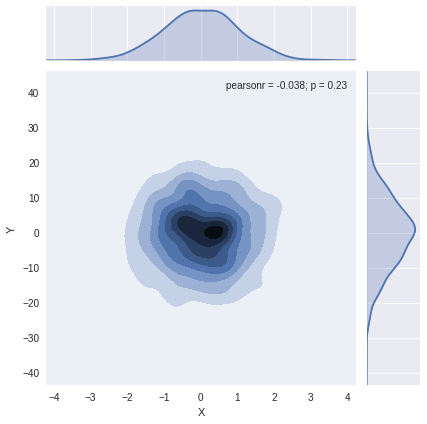

In [32]:
sns.jointplot('X','Y',dframe,kind='kde')